1. General Accident Statistics


In [3]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import gc



•	How many accidents occurred in the dataset’s time range?


In [4]:
# Load the dataset
df = dd.read_parquet('/Users/er/Desktop/Data Analysis/Projects/Python/US Accidents/USTrafficAccidents/Data/Parquet/US_Accidents_March23.parquet')  

# Get the shape of the DataFrame
num_rows = df.shape[0].compute()  # Number of rows
num_cols = df.shape[1]            # Number of columns 

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"There's a total of {num_rows} accidents in the dataset's time range" )

Number of rows: 7728394
Number of columns: 46
There's a total of 7728394 accidents in the dataset's time range


•	What is the trend in accidents over the years? Are accidents increasing or decreasing over time?

Accidents in the year 2016: 410821
Accidents in the year 2017: 718093
Accidents in the year 2018: 893426
Accidents in the year 2019: 954303
Accidents in the year 2020: 1178913
Accidents in the year 2021: 1563753
Accidents in the year 2022: 1762452
Accidents in the year 2023: 246633
Total accidents from 2016 to 2023: 7728394


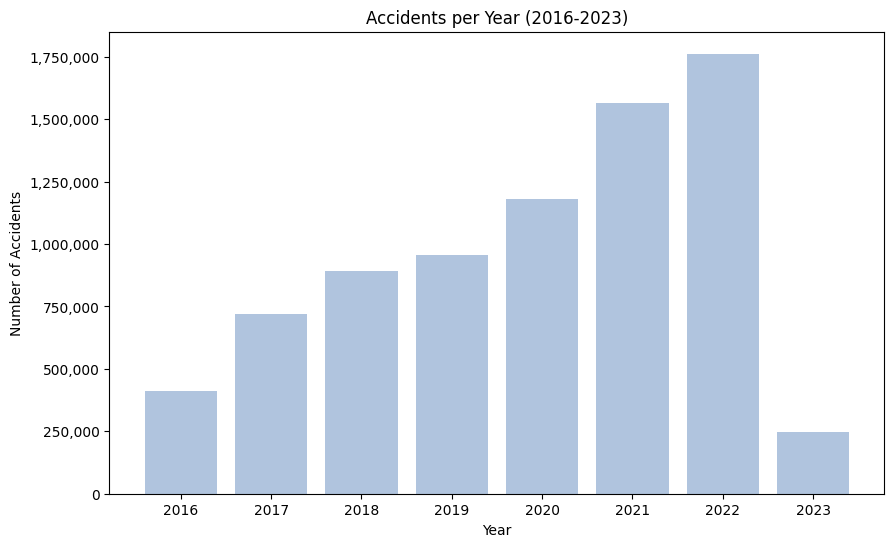

In [5]:
# List of years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Initialize total count and dictionary to store year counts
total_count = 0
yearly_counts = {}

# For loop to count occurrences of each year
for year in years:
    count = df['Start_Time'].str.contains(str(year)).sum().compute()
    yearly_counts[year] = count  # Store count in dictionary
    total_count += count  # Accumulate the count for each year
    print(f"Accidents in the year {year}: {count}")

# Print total occurrences
print(f"Total accidents from 2016 to 2023: {total_count}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.keys(), yearly_counts.values(), color='lightsteelblue')

# Y-axis formatter to display numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Year (2016-2023)')
plt.xticks(years)  # Ensure all years are labeled
plt.show()

•	Which states had the highest and lowest number of accidents?


The first 5 states with the most incidents are: CA (1741433), FL (880192), TX (582837), SC (382557), NY (347960).
The states with the least incidents are: WY (3757), ND (3487), ME (2698), VT (926), SD (289).
Has duplicates: False


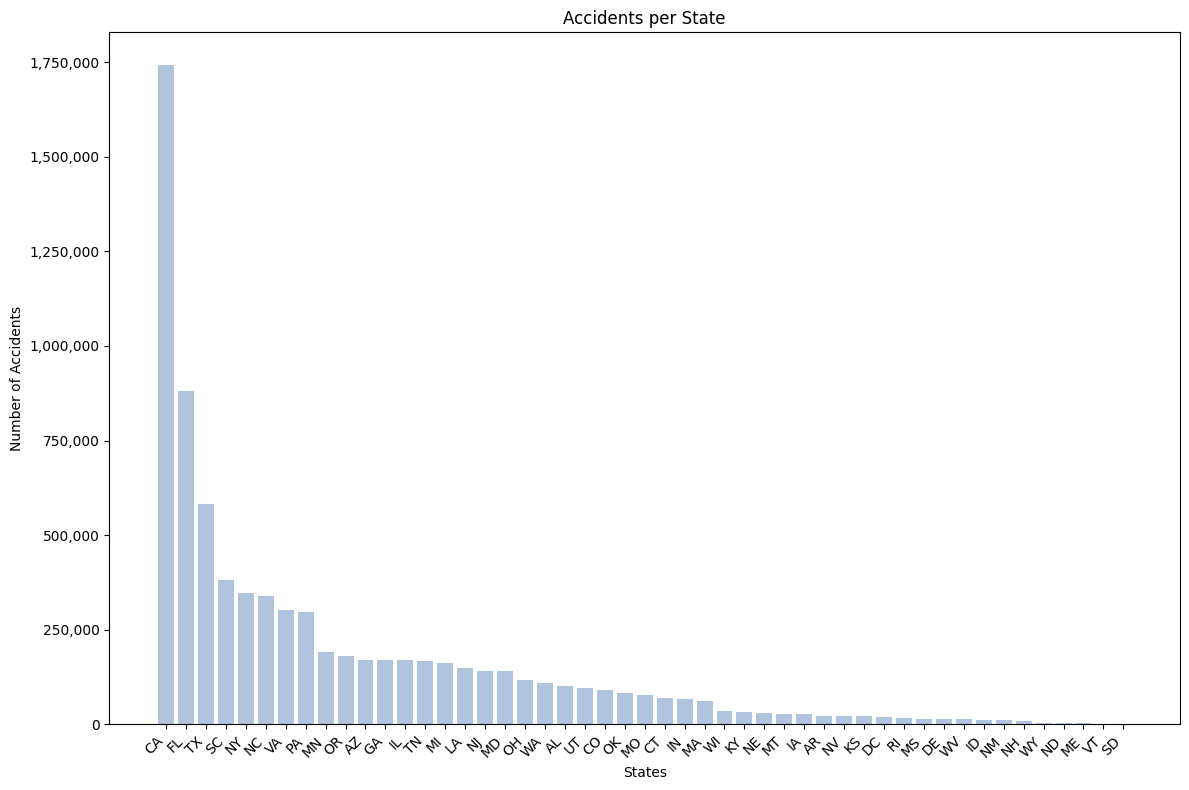

In [6]:
# Get unique state names and check for duplicates
unique_states = df['State'].unique().compute()
has_duplicates = len(unique_states) != len(set(unique_states))

# Count accidents for each state and sort in descending order
state_counts = df['State'].value_counts().compute()
sorted_state_counts = state_counts.sort_values(ascending=False)

# Get the top 5 and least 5 states
top_5_states = sorted_state_counts.head(5)
least_5_states = sorted_state_counts.tail(5)

# Print results
print(f"The first 5 states with the most incidents are: {', '.join([f'{state} ({count})' for state, count in top_5_states.items()])}.")
print(f"The states with the least incidents are: {', '.join([f'{state} ({count})' for state, count in least_5_states.items()])}.")
print("Has duplicates:", has_duplicates)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.bar(sorted_state_counts.index, sorted_state_counts.values, color='lightsteelblue')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Accidents per State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total number of accidents: 7728394
Top 5 States with the Most Accidents:
CA: 1741433
FL: 880192
TX: 582837
SC: 382557
NY: 347960

Bottom 5 States with the Least Accidents:
WY: 3757
ND: 3487
ME: 2698
VT: 926
SD: 289


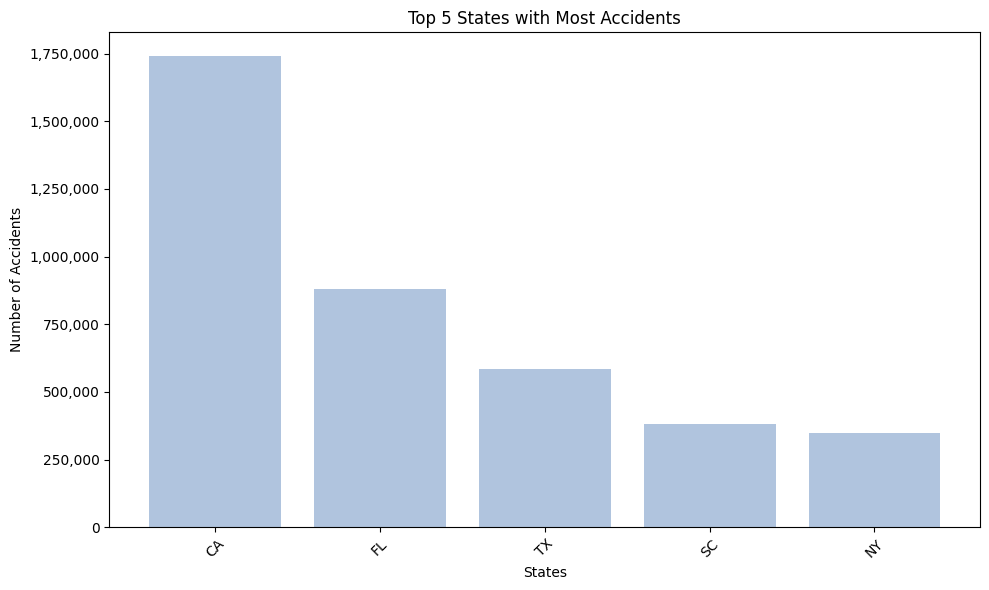

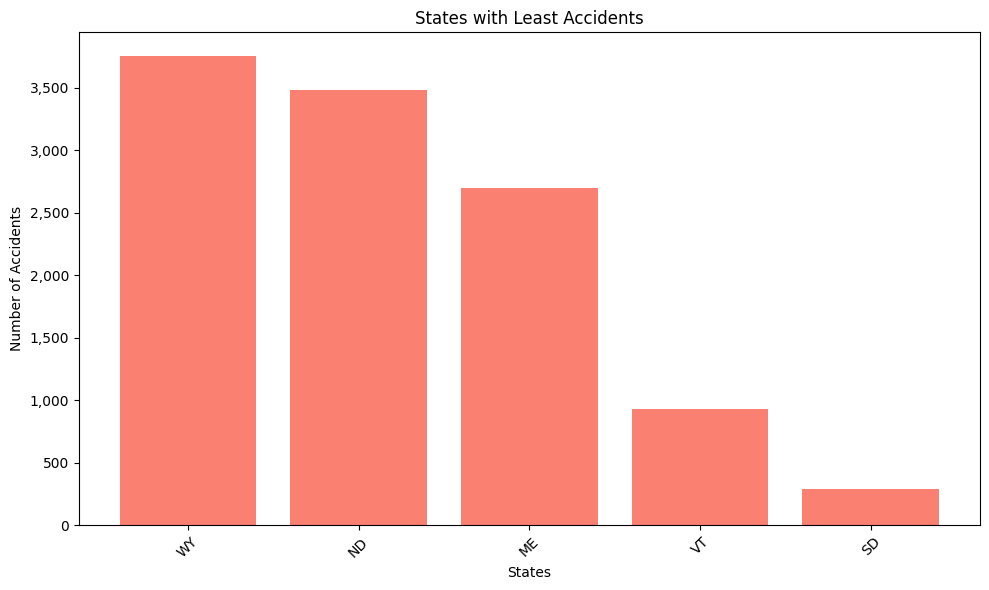

In [7]:
# Check if 'State' exists in the DataFrame
if 'State' not in df.columns:
    raise ValueError("The column 'State' does not exist in the DataFrame.")

# Count accidents for each state using groupby and sort in descending order
state_counts = df.groupby('State').size().compute().sort_values(ascending=False)

# Get the top 5 and least 5 states
top_5_states = state_counts.head(5)
least_5_states = state_counts.tail(5)

# Print the total number of accidents
total_accidents = state_counts.sum()
print(f"Total number of accidents: {total_accidents}")

# Print the top 5 and least 5 states
print("Top 5 States with the Most Accidents:")
for state, count in top_5_states.items():
    print(f"{state}: {count}")

print("\nBottom 5 States with the Least Accidents:")
for state, count in least_5_states.items():
    print(f"{state}: {count}")

# Plotting for Top 5 States
plt.figure(figsize=(10, 6))
plt.bar(top_5_states.index, top_5_states.values, color='lightsteelblue')
plt.title('Top 5 States with Most Accidents')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for Least 5 States
plt.figure(figsize=(10, 6))
plt.bar(least_5_states.index, least_5_states.values, color='salmon')
plt.title('States with Least Accidents')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

•	What is the distribution of accidents across different months? Are there seasonal trends?


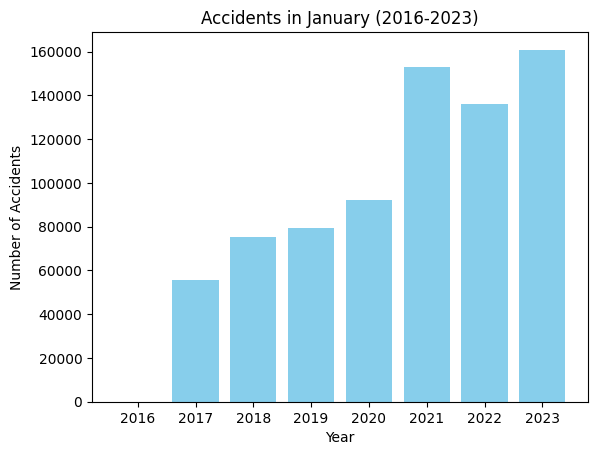

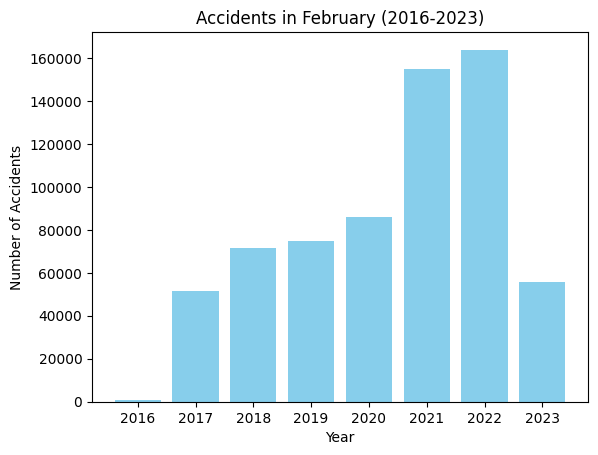

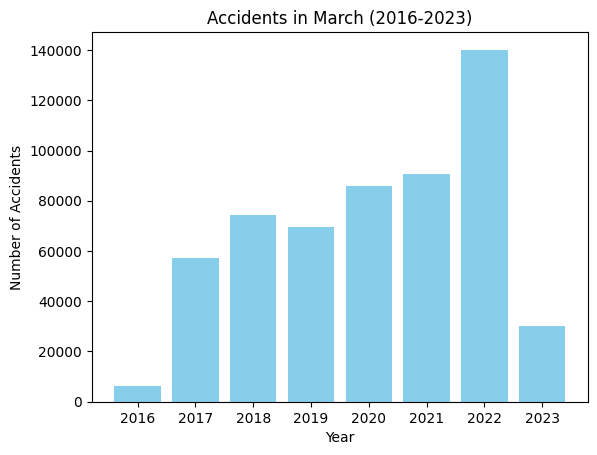

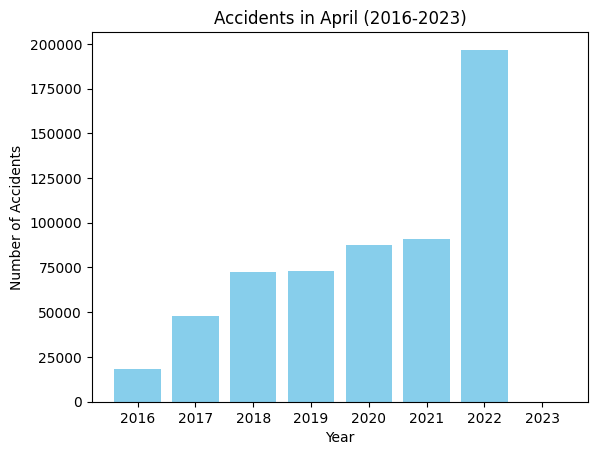

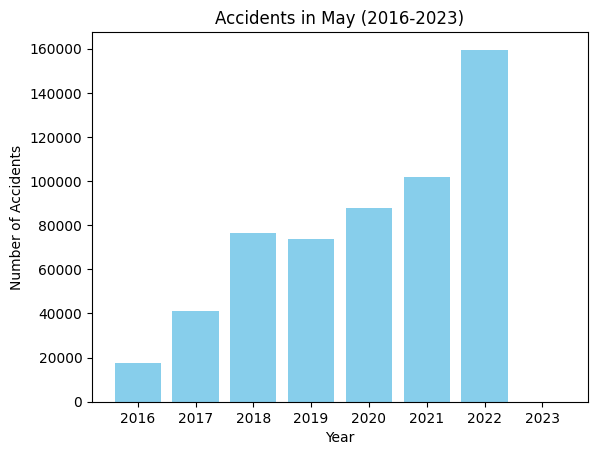

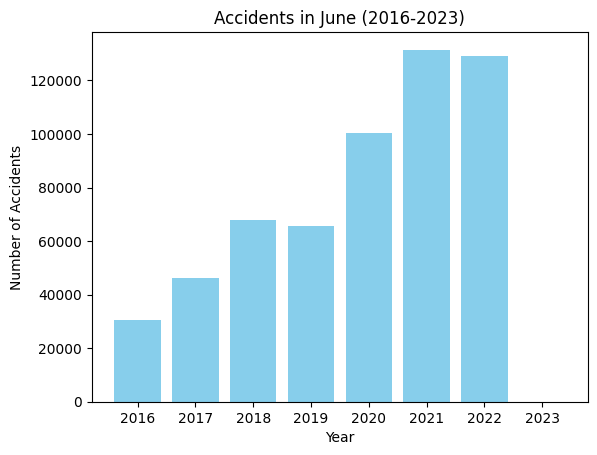

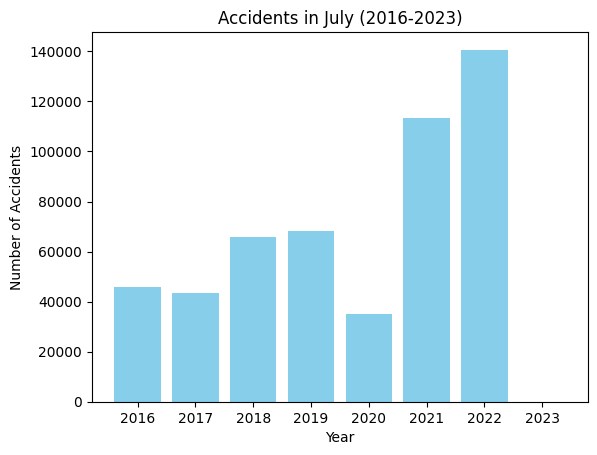

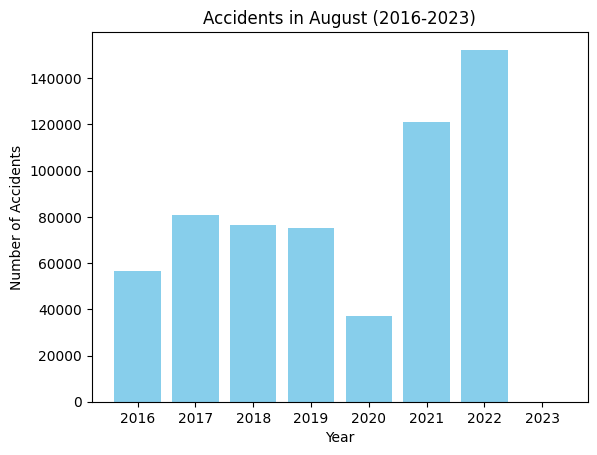

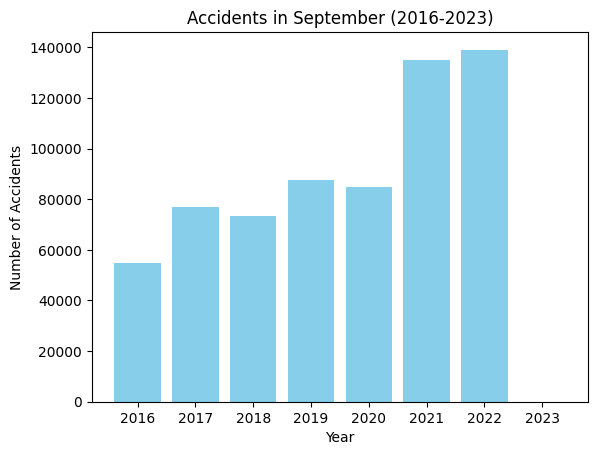

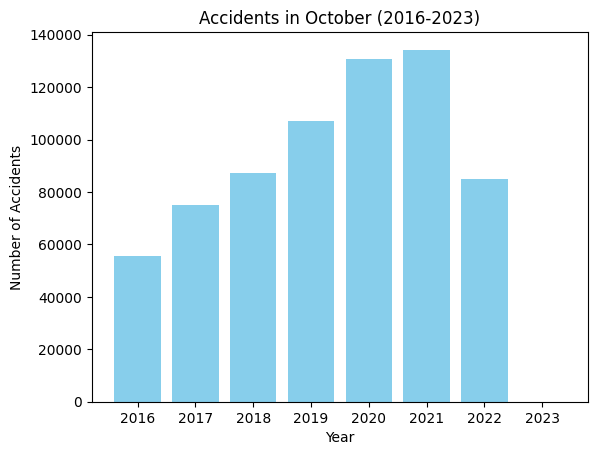

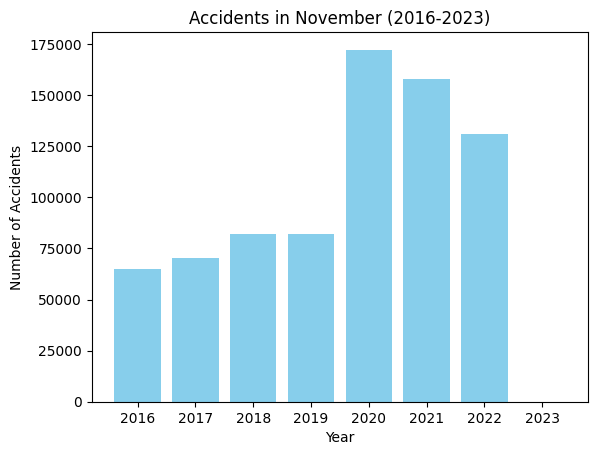

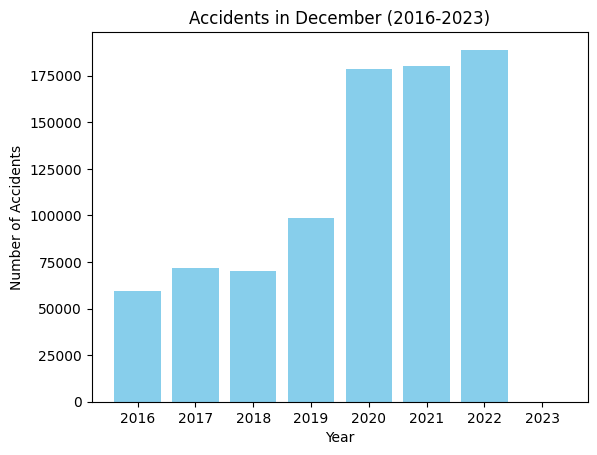

In [8]:
# List of years
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

months = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

# Initialize dictionary to hold values for each month across the years
monthly_trends = {f"{str(month).zfill(2)}": [] for month in range(1, 13)}

# For loop to count occurrences for each month across all years
for year in years:
    for month in range(1, 13):
        year_month = f"{year}-{str(month).zfill(2)}"  # Format as 'YYYY-MM'
        count = df['Start_Time'].str.contains(year_month).sum().compute()
        
        # Append the count to the corresponding month list
        monthly_trends[str(month).zfill(2)].append(count)

# Loop through each month in monthly_trends to generate bar charts
for month in monthly_trends:
    plt.figure()  # Create a new figure for each month
    plt.bar(years, monthly_trends[month], color='skyblue')
    
    # Get the month name from the months list based on the month number
    month_index = int(month) - 1  # Convert to 0-based index
    plt.title(f"Accidents in {months[month_index]} (2016-2023)")  # Use month name in title
    plt.xlabel("Year")
    plt.ylabel("Number of Accidents")
    plt.xticks(years)  # Ensure all years are labeled on the x-axis
    plt.show()

	•	Which days of the week are most accidents likely to occur?


           Start_Time   date_only weekday
0 2016-02-08 05:46:00  2016-02-08  Monday
1 2016-02-08 06:07:59  2016-02-08  Monday
2 2016-02-08 06:49:27  2016-02-08  Monday
3 2016-02-08 07:23:34  2016-02-08  Monday
4 2016-02-08 07:39:07  2016-02-08  Monday
Counts of each weekday:
weekday
Friday       1366499
Monday       1210921
Saturday      668683
Thursday     1316229
Sunday        562744
Tuesday      1290929
Wednesday    1312389
Name: count, dtype: int64


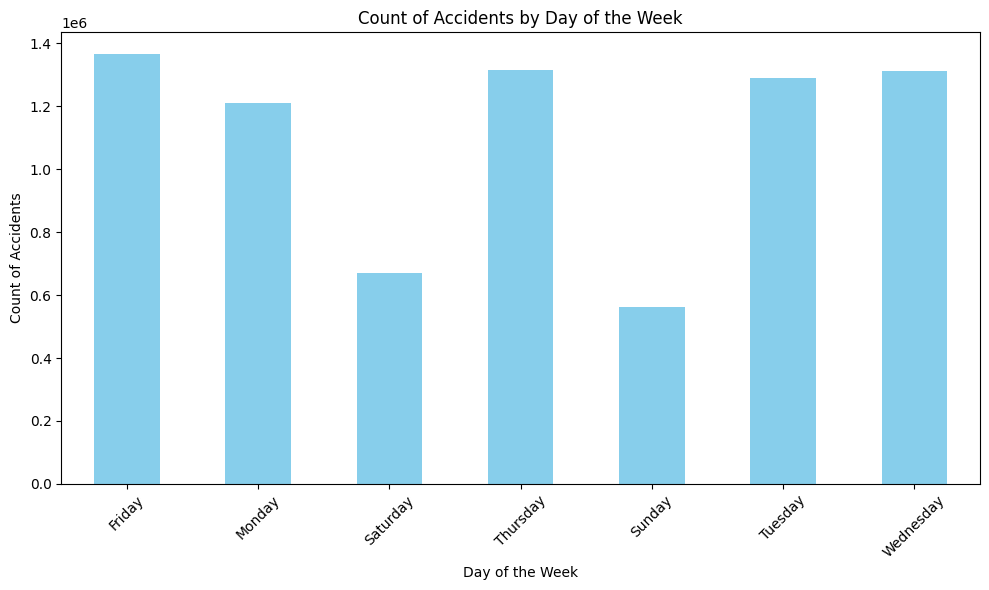

In [9]:
# Ensure 'Start_Time' is in datetime format, using mixed format to handle variations
df['Start_Time'] = dd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract only the date (removes the time)
df['date_only'] = df['Start_Time'].dt.date

# Extract the day of the week (e.g., 'Monday', 'Tuesday') and store in 'weekday' column
df['weekday'] = df['Start_Time'].dt.day_name()

# To see a sample of the results with the new 'weekday' column
print(df[['Start_Time', 'date_only', 'weekday']].head())

# Create a new DataFrame with only the 'weekday' column
weekday_df = df[['weekday']]

# Count how many times each day appears
weekday_counts = weekday_df['weekday'].value_counts().compute()  # Get counts of each day of the week

# Print the counts for each day
print("Counts of each weekday:")
print(weekday_counts)

# Plotting the counts
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

•	At what time of day do most accidents happen (morning, afternoon, or night)?

           Start_Time hour_only time_of_day
0 2016-02-08 05:46:00  05:46:00     Morning
1 2016-02-08 06:07:59  06:07:59     Morning
2 2016-02-08 06:49:27  06:49:27     Morning
3 2016-02-08 07:23:34  07:23:34     Morning
4 2016-02-08 07:39:07  07:39:07     Morning
Counts of each time of day:
time_of_day
Night         485636
Afternoon    2884131
Evening       952389
Morning      3406238
Name: count, dtype: int64


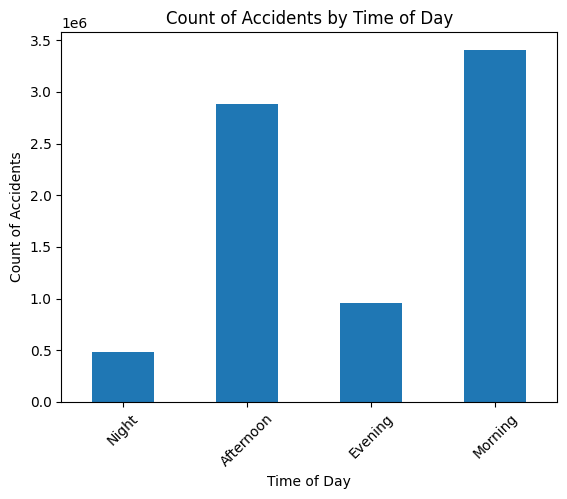

In [10]:
# Ensure 'Start_Time' is in datetime format
df['Start_Time'] = dd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract only the hour (HH:MM:SS) from 'Start_Time' and store in a new column 'hour_only'
df['hour_only'] = df['Start_Time'].dt.strftime('%H:%M:%S')

# Define a function to categorize the time of day
def categorize_time_of_day(hour):
    if hour >= "00:00:00" and hour < "12:00:00":
        return "Morning"
    elif hour >= "12:00:00" and hour < "18:00:00":
        return "Afternoon"
    elif hour >= "18:00:00" and hour < "21:00:00":
        return "Evening"
    else:
        return "Night"

# Apply the function to create the 'time_of_day' column using Dask's map_partitions
df['time_of_day'] = df['hour_only'].map(categorize_time_of_day, meta=('x', 'object'))

# To see a sample of the results with the new 'time_of_day' column
print(df[['Start_Time', 'hour_only', 'time_of_day']].head())

# Create a new DataFrame with only the 'time_of_day' column
time_of_days_df = df[['time_of_day']]

# Count how many times each time of day appears
time_of_day_counts = time_of_days_df['time_of_day'].value_counts().compute()  # Get counts of each time of day

# Print the counts for each time of day
print("Counts of each time of day:")
print(time_of_day_counts)

# Plotting the counts
time_of_day_counts.plot(kind='bar')
plt.title('Count of Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=45)
plt.show()


In [11]:
gc.collect()

42750